# INPUT

In [ ]:
!pip install streamlit
!pip install opencv-python
!pip install streamlit-drawable-canvas
!pip install svgpathtools
!pip install keras-utils
!npm install -g localtunnel

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
from datetime import datetime
import matplotlib.pyplot as plt
import torch
from torch import nn # Neural network
from torch import optim # Optimizer
from torch.utils.data import Dataset, DataLoader # Dataset, Dataloader
from torch.utils.tensorboard import SummaryWriter # Logger
import torchvision
from torchvision import transforms as T # Data augmentation
from tensorflow.keras.utils import to_categorical
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from torchvision.datasets import MNIST
from keras.datasets import mnist
#tensorflow
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, MaxPooling2D, Conv2D


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

**Getting** **Data**

The dataset will be loaded directl from the Keras for convenience. It contains 60k images for traning and 10k images for testing.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Let's explore the data by showing the 20th image and its respective label. Data shape is (28,28). Let's reshape it to (28,28,1) to fit in the model layers.

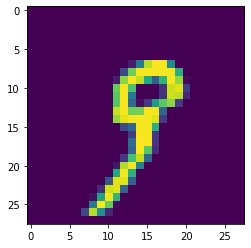

In [ ]:
plt.imshow(X_train[19]) 

In [ ]:
y_train[19]

9

In [ ]:
X_train[19].shape

(28, 28)

In [ ]:
X_train= X_train.reshape(60000,28,28,1)
X_test= X_test.reshape(10000,28,28,1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


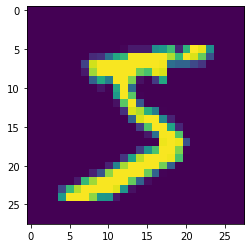

In [ ]:
x = X_train[0].reshape(28,28)
plt.imshow(x)

We will apply one-hot encoding to the label y, convert it into a vector of 1x10

In [ ]:
#One-hot encode cho y (vì y đang ở dạng số) chuyển về dạng vector (nên dùng hàm categorical của keras) 
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Normalize the data
#The value of gray image varies from 0 to 255
X_train = X_train / 255.0
X_test = X_test / 255.0

# MODEL

Our model includes 15 layers, using `adam` optimizer and `categorical_crossentropy` loss function. Let's create and take a look at the newly created model summary.

In [ ]:
def create_model():
  model = Sequential() #tạo chuỗi
  #add model layers
  #lớp layer convolution đầu tiên
  model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1))) #có 64 lớp kernel, kernel_size là matrix 3x3, relu là hàm để mô hình ko linear, input shape 28x28 1 chiều
  model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling=2,2 -> giảm shape -> (28-3+1)/2

  #lớp layer convolution 2
  model.add(Conv2D(64, kernel_size=(3,3),activation='relu',input_shape=(28,28,1))) #có 64 lớp kernel, kernel_size là matrix 3x3, relu là hàm để mô hình ko linear, input shape 28x28 1 chiều
  model.add(MaxPooling2D(pool_size=(2,2)))

  #lớp layer convolution 3
  model.add(Conv2D(64, kernel_size=(3,3),activation='relu',input_shape=(28,28,1))) #có 64 lớp kernel, kernel_size là matrix 3x3, relu là hàm để mô hình ko linear, input shape 28x28 1 chiều
  model.add(MaxPooling2D(pool_size=(2,2)))

  #lớp fully connected
  model.add(Flatten()) #chuyển thành vecto 1D
  model.add(Dense(64)) #hidden layer có 64 giá trị khi flatten ra thì số nodes trong vecto sẽ connect với 64 nodes trong layer này
  model.add(Activation('relu'))

  #lớp fully connected 2
  model.add(Flatten()) 
  model.add(Dense(32)) 
  model.add(Activation('relu'))

  #lớp fully connected
  model.add(Flatten()) 
  model.add(Dense(10)) #vì cuối cùng output có 10 lable nên lớp layer cuối có 10 nodes
  model.add(Activation('softmax')) #hàm tính xác suất của 10 lable

  model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

  # There are several loss functions implemented in Keras, but the most commonly used are 
  # mean_squared_error, categorical_crossentropy, and binary_crossentropy.

  return model

model = create_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

# TRAIN

Let's train the model with 5 epochs. 

In [ ]:
# Train model 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 106s 55ms/step - loss: 0.2181 - accuracy: 0.9326 - val_loss: 0.0964 - val_accuracy: 0.9699
Epoch 2/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0738 - accuracy: 0.9773 - val_loss: 0.0847 - val_accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0611 - val_accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0578 - val_accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0494 - val_accuracy: 0.9857


In [ ]:
# Evaluate model
test_loss, test_acr = model.evaluate(X_test, y_test)
train_loss, train_acr = model.evaluate(X_train, y_train)

1875/1875 [==============================] - 26s 14ms/step - loss: 0.0243 - accuracy: 0.9925


The result is displayed as a vector, with elements are the probabilities respective to its position.

In [ ]:
# Explore a prediction for the 152th image
predictions = model.predict(X_test[152].reshape(1,28,28,1))
print(predictions)

[[1.3366381e-05 1.2538140e-08 1.4151653e-05 3.4632969e-05 1.1228250e-05
  9.9918956e-01 1.2790387e-04 6.5447750e-07 5.2563879e-05 5.5601948e-04]]


In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
